In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from model import create_markov_chain, visualize_markov_chain, arendt_sampling
from functions import compute_traffic_jams, dummy_compute_traffic_jams, find_stationary_distribution


%load_ext autoreload
%autoreload 2

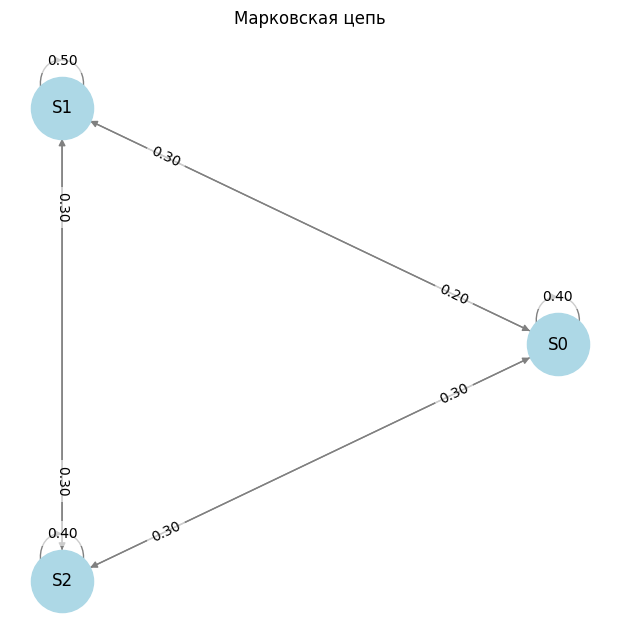

Сэмплированные состояния: [np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(0), np.int64(0), np.int64(2), np.int64(0), np.int64(0), np.int64(2), np.int64(0)]


In [2]:
# Создание цепи
P = create_markov_chain()
visualize_markov_chain(P)

# Задание начального распределения (должно суммироваться в 1)
initial_distribution = np.array([0.5, 0.3, 0.2])

# Выполнение сэмплирования
sampled_states = arendt_sampling(P, initial_distribution, steps=15)
print("Сэмплированные состояния:", sampled_states)

## посчитаем пробки

In [3]:
P

array([[0.4, 0.3, 0.3],
       [0.2, 0.5, 0.3],
       [0.3, 0.3, 0.4]])

In [4]:
# Задание начального распределения (должно суммироваться в 1)
initial_distribution = np.array([0.5, 0.3, 0.2])

# Вычисление пробок
traffic_jams_1 = dummy_compute_traffic_jams(P, initial_distribution, dt=1)
traffic_jams_2= compute_traffic_jams(P, initial_distribution, dt=1)

print("Суммарные пробки за dt:", traffic_jams_1 , traffic_jams_1 == traffic_jams_2)

Суммарные пробки за dt: [-0.18  0.06  0.12] [ True  True  True]


* проверим вручную: 
1) 0.3 * 0.2 + 0.2 * 0.3 - 0.5 * ( 0.3 + 0.3) = -0.18
2) 0.5 * 0.3 + 0.2 * 0.3 - 0.3 * (0.2 + 0.3) = 0.05
3) 0.3 * 0.3 + 0.5 * 0.3 - 0.2 * (0.3 + 0.3) = 0.12 

## Стационарное распределение для данной матрицы переходов

In [5]:
# Поиск стационарного распределения
stationary_distribution = find_stationary_distribution(P)
print("Стационарное распределение:", stationary_distribution)
print('CHECK', stationary_distribution@P - stationary_distribution)

Стационарное распределение: [0.29166667 0.375      0.33333333]
CHECK [ 0.00000000e+00  5.55111512e-17 -1.11022302e-16]


## TODO:
